# Wine Quality Prediction - ML
##### Importing libraries and data processing

In [17]:
import pandas as pd  

# loading datasets
red_wine = pd.read_csv(r"C:\Users\JP\Desktop\Wine Quality Prediction\dataset\winequality-red.csv", sep=";")
white_wine = pd.read_csv(r"C:\Users\JP\Desktop\Wine Quality Prediction\dataset\winequality-white.csv", sep=";")

# new column to differentiate wine type
red_wine["wine_type"] = "Red"
white_wine["wine_type"] = "White"


In [14]:
# Data Handling
import numpy as np  
import pandas as pd  

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Machine Learning
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  


In [15]:
# Advanced ML Models
import xgboost as xgb  
import lightgbm as lgb  

# Deployment
from flask import Flask, request, jsonify  
from fastapi import FastAPI  
import uvicorn  
import joblib  

In [22]:
# Checking for missing values
print(red_wine.isnull().sum())
print(white_wine.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [23]:
# Merging both wine types
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)


In [24]:
# Creating new features
# Sulfer Dioxide ratio
wine_data["SO2_ratio"] = wine_data["free sulfur dioxide"] / wine_data["total sulfur dioxide"]


In [25]:
# Creating new category
# Acidity Level
wine_data["acidity_level"] = pd.cut(wine_data["pH"], bins=[0, 3.1, 3.4, 3.7, 4.1], 
                                     labels=["Very Acidic", "Acidic", "Neutral", "Basic"])


In [26]:
# Scaling numerical features, to check uniformity
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                "density", "pH", "sulphates", "alcohol"]
wine_data[num_features] = scaler.fit_transform(wine_data[num_features])

In [27]:
# Converting categorical variables into numerical format
wine_data = pd.get_dummies(wine_data, columns=["wine_type", "acidity_level"], drop_first=True)


In [28]:
# Spliting the dataset into training and testing sets
from sklearn.model_selection import train_test_split  
X = wine_data.drop("quality", axis=1)  # Features  
y = wine_data["quality"]  # Target variable  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Developing the ML Model

##### Training Regression Models

In [50]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
# Predicting
y_pred = model.predict(X_test)

In [52]:
# Evaluating
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R²: {r2}")

MSE: 0.1698693736019853, R²: 0.17998679946826623


In [53]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Predicting
y_pred_rf = rf.predict(X_test)

In [55]:
# Evaluating
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MSE: 0.11360138461538462, R²: 0.45161018135284825


In [56]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
# Predicting
y_pred_xgb = xgb.predict(X_test)

In [58]:
# Evaluating
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}")

XGBoost - MSE: 0.13033701479434967, R²: 0.370822012424469


##### Tune the Best Regression Model

In [59]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

In [60]:
xgb = XGBRegressor()
grid_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [61]:
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}


In [62]:
# Evaluating tuned model
y_pred_tuned = best_xgb.predict(X_test)
print(f"Optimized XGBoost → MSE: {mean_squared_error(y_test, y_pred_tuned):.3f}, R²: {r2_score(y_test, y_pred_tuned):.3f}")

Optimized XGBoost → MSE: 0.118, R²: 0.431


##### Using Regression outputs to define Classification labels

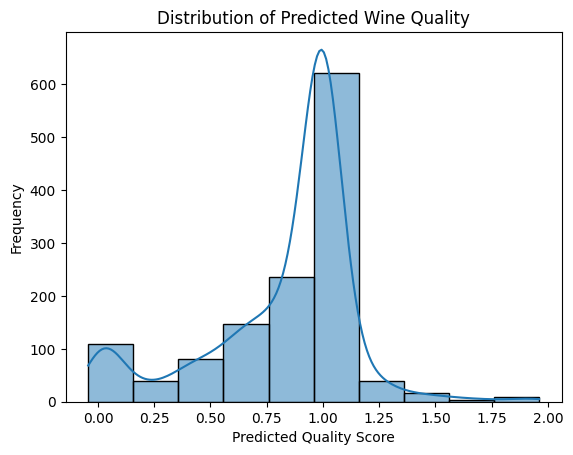

In [63]:
# Analyzing distribution of predicted scores
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_pred_tuned, bins=10, kde=True)
plt.xlabel("Predicted Quality Score")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Wine Quality")
plt.show()


In [64]:
# Manually defining quality labels based on above
def categorize_quality(score):
    if score <= 4: return "Poor"
    elif score <= 6: return "Good"
    else: return "Excellent"

wine_data["quality_label"] = wine_data["quality"].apply(categorize_quality)

##### Training Classification Model

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [67]:
# Preparing data
X = wine_data.drop(["quality", "quality_label"], axis=1)
y = wine_data["quality_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Training classifiers
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))

Accuracy: 0.8515384615384616
              precision    recall  f1-score   support

   Excellent       0.78      0.56      0.66       252
        Good       0.86      0.96      0.91       999
        Poor       0.83      0.10      0.18        49

    accuracy                           0.85      1300
   macro avg       0.83      0.54      0.58      1300
weighted avg       0.85      0.85      0.83      1300



In [ ]:
# Chosen Classification Model: Hyperparameter tuning for Random Forest

In [72]:
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [73]:
grid_search_clf = RandomizedSearchCV(RandomForestClassifier(), param_grid_clf, cv=5, scoring='accuracy', n_iter=10, random_state=42)
grid_search_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [74]:
best_clf = grid_search_clf.best_estimator_
print("Best Parameters:", grid_search_clf.best_params_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 20}


In [75]:
# Evaluating tuned classifier
y_pred_tuned_clf = best_clf.predict(X_test)
print("Optimized Classification Accuracy:", accuracy_score(y_test, y_pred_tuned_clf))
print(classification_report(y_test, y_pred_tuned_clf))

Optimized Classification Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

   Excellent       0.78      0.54      0.64       252
        Good       0.86      0.96      0.91       999
        Poor       0.83      0.10      0.18        49

    accuracy                           0.85      1300
   macro avg       0.82      0.53      0.57      1300
weighted avg       0.84      0.85      0.83      1300



##### Saving the Model

In [76]:
import pickle

In [77]:
with open("best_regression_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

In [78]:
with open("best_classification_model.pkl", "wb") as f:
    pickle.dump(best_clf, f)

## Exporting Data for PowerBI

In [79]:
import pandas as pd

In [80]:
wine_data["regression_prediction"] = best_xgb.predict(X)
wine_data["classification_prediction"] = best_clf.predict(X)

In [81]:
wine_data.to_csv("wine_predictions.csv", index=False)